In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [10]:
from fastbook import *
from fastai.text.all import *

In [11]:
import pandas as pd

In [12]:
import os
os.getcwd()

'/content'

## Practice Creating the Language Model DataLoader

In [16]:
# read and combine the data
lyrics_data = pd.read_csv('sample_data/lyrics-data.csv')
lyrics_data.rename(columns={"ALink": "Link"}, inplace=True)
artist_data = pd.read_csv('sample_data/artists-data.csv')
print(artist_data.columns, lyrics_data.columns)
merged_dfs = lyrics_data.merge(artist_data, how='inner', on='Link')
eng_artists = merged_dfs.loc[merged_dfs['Idiom'] == 'ENGLISH', ['Artist', 'SName', 'Lyric', 'Genre']].drop_duplicates(subset=['SName'])
eng_artists.reset_index(inplace=True, drop=True)

eng_artists.head()

Index(['Artist', 'Songs', 'Popularity', 'Link', 'Genre', 'Genres'], dtype='object') Index(['Link', 'SName', 'SLink', 'Lyric', 'Idiom'], dtype='object')


,Artist,SName,Lyric,Genre
0,10000 Maniacs,More Than This,I could feel at the time. There was no way of knowing. Fallen leaves in the night. Who can say where they're blowing. As free as the wind. Hopefully learning. Why the sea on the tide. Has no way of turning. More than this. You know there's nothing. More than this. Tell me one thing. More than this. You know there's nothing. It was fun for a while. There was no way of knowing. Like a dream in the night. Who can say where we're going. No care in the world. Maybe I'm learning. Why the sea on the tide. Has no way of turning. More than this. You know there's nothing. More than this. Tell me one...,Rock
1,10000 Maniacs,Because The Night,"Take me now, baby, here as I am. Hold me close, and try and understand. Desire is hunger is the fire I breathe. Love is a banquet on which we feed. Come on now, try and understand. The way I feel under your command. Take my hand, as the sun descends. They can't hurt you now can't hurt you now, can't hurt you now. Because the night belongs to lovers. Because the night belongs to us. Because the night belongs to lovers. Cause the night belongs to us. Have I a doubt, baby, when I'm alone. Love is a ring a telephone. Love is an angel, disguised as lust. Here in our bed 'til the morning comes. ...",Rock
2,10000 Maniacs,These Are Days,"These are. These are days you'll remember. Never before and never since, I promise. Will the whole world be warm as this. And as you feel it,. You'll know it's true. That you - you are blessed and lucky. It's true - that you. Are touched by something. That will grow and bloom in you. These are days you'll remember. When May is rushing over you. With desire to be part of the miracles. You see in every hour. You'll know it's true. That you are blessed and lucky. It's true that you are touched. By something that will grow and bloom in you. These are days. These are the days you might fill. Wi...",Rock
3,10000 Maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins and beds to dig.. 500 men with axes and they all dig for me."" A lie to ssay, ""O my. river where mant fish do swim, half of the catch is mine when you haul. your nets in."" Never will he believe that his greed is a blinding. ray. No devil or redeemer will cheat him. He'll take his gold to. where he's lying cold.. A lie to say, ""O my mine gave a diamond as big as a fist."". But with every gem in his pocket, the jewels he has missed. A lie to. say, ""O my garden is growing taller by the day."" He only eats the. best and tosses the rest away. Never will ...",Rock
4,10000 Maniacs,Everyday Is Like Sunday,"Trudging slowly over wet sand. Back to the bench where your clothes were stolen. This is a coastal town. That they forgot to close down. Armagedon - come armagedon come armagedon come. Everyday is like sunday. Everyday is silent and grey. Hide on a promanade. Etch on a post card:. How I dearly wish I was not here. In the seaside town. That they forgot to bomb. Come, come nuclear bomb!. Everyday is like sunday. Everyday is silent and grey. Trudging back over pebbles and sand. And a strange dust lands on your hands. (and on your face). Everyday is like sunday. Win yourself a cheap tray. Shar...",Rock


In [29]:
eng_artists.loc[eng_artists['Artist'] == 'Bon Jovi'].head()

,Artist,SName,Lyric,Genre
5766,Bon Jovi,It's My Life,This ain't a song for the broken-hearted. No silent prayer for the faith-departed. I ain't gonna be just a face in the crowd. You're gonna hear my voice when I shout it out loud. It's my life. It's now or never. I ain't gonna live forever. I just want to live while I'm alive. (It's my life). My heart is like an open highway. Like Frankie said. I did it my way. I just wanna live while I'm alive. It's my life. This is for the ones who stood their ground. For Tommy and Gina who never backed down. Tomorrow's getting harder make no mistake. Luck ain't even lucky. Got to make your own breaks. It...,Rock
5767,Bon Jovi,Livin' On A Prayer,"Once upon a time. Not so long ago. Tommy used to work on the docks. Union's been on strike. He's down on his luck. It's tough, so tough. Gina works the diner all day. Working for her man, she brings home her pay. For love, for love. She says, we've got to hold on to what we've got. It doesn't make a difference if we make it or not. We've got each other and that's a lot for love. We'll give it a shot. We're half way there. Livin' on a prayer. Take my hand, we'll make it, I swear. Livin' on a prayer. Tommy got his six string in hock. Now he's holding in. When he used to make it talk, so toug...",Rock
5768,Bon Jovi,I'll Be There For You,"I guess this time you're really leaving. I heard your suitcase say goodbye. And as my broken heart lies bleeding. You say true love is suicide. You say you've cried a thousand rivers. And now you're swimming for the shore. You left me drowning in my tears. And you won't save me anymore. I'll pray to God to give me one more chance, girl. I'll be there for you. These five words I swear to you. When you breathe I wanna be the air for you. I'll be there for you. I'd live and I'd die for you. I'll steal the sun from the sky for you. Words can't say what love can do. I'll be there for you. I kno...",Rock
5769,Bon Jovi,Bed Of Roses,"Sitting here, wasted and wounded. At this old piano. Trying hard to capture the moment. This morning I don't know. 'Cause a bottle of vodka. Is still lodged in my head. And some blond gave me nightmares. I think that she's still in my bed. As I dream about movies. They won't make of me when I'm dead. With an ironclad fist I wake up. And french kiss the morning. While some marching band keeps. It's own beat in my head. While we're talking. About all of the things that I long to believe. About love, the truth. And what you mean to me. And the truth is baby, you're all that I need. I wanna la...",Rock
5770,Bon Jovi,Misunderstood,"Should I? Could I?. Have said the wrong things right a thousand times. If I could just rewind, I see it in my mind. If I could turn back time, you'd still be mine. You cried, I died. I should have shut my mouth, things headed south. As the words slipped off my tongue,. They sounded dumb. If this old heart could talk,. It'd say you're the one. I'm wasting time when I think about it. [Chorus:]. I should have drove all night,. I would have run all the lights. I was misunderstood. I stumbled like my words, Did the best I could. Damn, misunderstood. Could I? Should I?. Apologize for sleeping on...",Rock


In [30]:
artist_name = "Bon Jovi"

artist_df = eng_artists.loc[eng_artists['Artist'] == artist_name].reset_index(drop=True)
artist_df.head()

,Artist,SName,Lyric,Genre
0,Bon Jovi,It's My Life,This ain't a song for the broken-hearted. No silent prayer for the faith-departed. I ain't gonna be just a face in the crowd. You're gonna hear my voice when I shout it out loud. It's my life. It's now or never. I ain't gonna live forever. I just want to live while I'm alive. (It's my life). My heart is like an open highway. Like Frankie said. I did it my way. I just wanna live while I'm alive. It's my life. This is for the ones who stood their ground. For Tommy and Gina who never backed down. Tomorrow's getting harder make no mistake. Luck ain't even lucky. Got to make your own breaks. It...,Rock
1,Bon Jovi,Livin' On A Prayer,"Once upon a time. Not so long ago. Tommy used to work on the docks. Union's been on strike. He's down on his luck. It's tough, so tough. Gina works the diner all day. Working for her man, she brings home her pay. For love, for love. She says, we've got to hold on to what we've got. It doesn't make a difference if we make it or not. We've got each other and that's a lot for love. We'll give it a shot. We're half way there. Livin' on a prayer. Take my hand, we'll make it, I swear. Livin' on a prayer. Tommy got his six string in hock. Now he's holding in. When he used to make it talk, so toug...",Rock
2,Bon Jovi,I'll Be There For You,"I guess this time you're really leaving. I heard your suitcase say goodbye. And as my broken heart lies bleeding. You say true love is suicide. You say you've cried a thousand rivers. And now you're swimming for the shore. You left me drowning in my tears. And you won't save me anymore. I'll pray to God to give me one more chance, girl. I'll be there for you. These five words I swear to you. When you breathe I wanna be the air for you. I'll be there for you. I'd live and I'd die for you. I'll steal the sun from the sky for you. Words can't say what love can do. I'll be there for you. I kno...",Rock
3,Bon Jovi,Bed Of Roses,"Sitting here, wasted and wounded. At this old piano. Trying hard to capture the moment. This morning I don't know. 'Cause a bottle of vodka. Is still lodged in my head. And some blond gave me nightmares. I think that she's still in my bed. As I dream about movies. They won't make of me when I'm dead. With an ironclad fist I wake up. And french kiss the morning. While some marching band keeps. It's own beat in my head. While we're talking. About all of the things that I long to believe. About love, the truth. And what you mean to me. And the truth is baby, you're all that I need. I wanna la...",Rock
4,Bon Jovi,Misunderstood,"Should I? Could I?. Have said the wrong things right a thousand times. If I could just rewind, I see it in my mind. If I could turn back time, you'd still be mine. You cried, I died. I should have shut my mouth, things headed south. As the words slipped off my tongue,. They sounded dumb. If this old heart could talk,. It'd say you're the one. I'm wasting time when I think about it. [Chorus:]. I should have drove all night,. I would have run all the lights. I was misunderstood. I stumbled like my words, Did the best I could. Damn, misunderstood. Could I? Should I?. Apologize for sleeping on...",Rock


In [31]:
spacy = WordTokenizer()
tokenizer = Tokenizer(spacy)

test_txt = artist_df.loc[0, 'Lyric']
test_txt

"This ain't a song for the broken-hearted. No silent prayer for the faith-departed. I ain't gonna be just a face in the crowd. You're gonna hear my voice when I shout it out loud. It's my life. It's now or never. I ain't gonna live forever. I just want to live while I'm alive. (It's my life). My heart is like an open highway. Like Frankie said. I did it my way. I just wanna live while I'm alive. It's my life. This is for the ones who stood their ground. For Tommy and Gina who never backed down. Tomorrow's getting harder make no mistake. Luck ain't even lucky. Got to make your own breaks. It's my life. It's now or never. I ain't gonna live forever. I just want to live while I'm alive. (It's my life). My heart is like an open highway. Like Frankie said. I did it my way. I just wanna live while I'm alive. 'Cause it's my life. Better stand tall when they're calling you out. Don't bend, don't break, baby, don't back down. It's my life. It's now or never. 'Cause I ain't gonna live forever. I

In [32]:
tokenized_txt = tokenizer(test_txt)
tokenized_txt

(#425) ['xxbos','xxmaj','this','ai',"n't",'a','song','for','the','broken'...]

## Numericalization

In [33]:
numericalizer = Numericalize()

# get all songs tokenized
all_tokens = artist_df['Lyric'].map(tokenizer)
all_tokens[0]

(#425) ['xxbos','xxmaj','this','ai',"n't",'a','song','for','the','broken'...]

In [34]:
# apply the numericalizer to all songs
numericalizer.setup(all_tokens)
len(numericalizer.vocab)

1872

In [35]:
# check the numericalizer on the test_txt
test_numer = numericalizer(tokenized_txt)

" ".join(numericalizer.vocab[num] for num in test_numer)

"xxbos xxmaj this ai n't a song for the broken - hearted . xxmaj no silent prayer for the faith - xxunk . i ai n't gon na be just a face in the crowd . xxmaj you 're gon na hear my voice when i shout it out loud . xxmaj it 's my life . xxmaj it 's now or never . i ai n't gon na live forever . i just want to live while xxmaj i 'm alive . ( it 's my life ) . xxmaj my heart is like an open highway . xxmaj like xxmaj frankie said . i did it my way . i just wanna live while xxmaj i 'm alive . xxmaj it 's my life . xxmaj this is for the ones who stood their ground . xxmaj for xxmaj tommy and xxmaj gina who never xxunk down . xxmaj tomorrow 's getting harder make no mistake . xxmaj luck ai n't even lucky . xxmaj got to make your own breaks . xxmaj it 's my life . xxmaj it 's now or never . i ai n't gon na live forever . i just want to live while xxmaj i 'm alive . ( it 's my life ) . xxmaj my heart is like an open highway . xxmaj like xxmaj frankie said . i did it my way . i just wanna live w

In [36]:
bon_jovi_dl = LMDataLoader(all_tokens.map(numericalizer))

for x, y in bon_jovi_dl:
  print(x.shape, y.shape)

torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([64, 72])
torch.Size([64, 72]) torch.Size([6

## Create dataloader using fastai

In [37]:
bon_jovi_block = DataBlock(
    blocks=TextBlock.from_df('artist_df', seq_len=72, is_lm=True),
    get_items=ColReader('Lyric')
)
bon_jovi_block

In [38]:
dls_lm = bon_jovi_block.dataloaders(artist_df, bs=128, seq_len=80)
dls_lm.show_batch(max_n=2)

,text,text_
0,xxbos xxmaj you can lock up all the doors . xxmaj pull up the covers . xxmaj turn out the lights . xxmaj i 'll know where you are . xxmaj it 's alright . xxmaj you can go ahead and hide . xxmaj you know you ca n't keep me out . xxmaj i 'll find my way . xxmaj i 'm here to stay . xxmaj even the cops ca n't save you now . xxmaj hey baby,xxmaj you can lock up all the doors . xxmaj pull up the covers . xxmaj turn out the lights . xxmaj i 'll know where you are . xxmaj it 's alright . xxmaj you can go ahead and hide . xxmaj you know you ca n't keep me out . xxmaj i 'll find my way . xxmaj i 'm here to stay . xxmaj even the cops ca n't save you now . xxmaj hey baby xxmaj
1,"daddy does n't understand it , . xxmaj he always said she was good as gold , . xxmaj and he can see ( no reasons ) . 'cause there are ( no reasons ) . xxmaj what reason do you need to be xxunk . ( tell me why ) i do n't like xxmaj mondays ( xxunk ) . i want to shoot the whole day down . xxmaj the xxunk xxunk is xxunk so xxunk . xxmaj","does n't understand it , . xxmaj he always said she was good as gold , . xxmaj and he can see ( no reasons ) . 'cause there are ( no reasons ) . xxmaj what reason do you need to be xxunk . ( tell me why ) i do n't like xxmaj mondays ( xxunk ) . i want to shoot the whole day down . xxmaj the xxunk xxunk is xxunk so xxunk . xxmaj and"


# Train a model using transfer learning

SuggestedLRs(valley=0.004365158267319202)

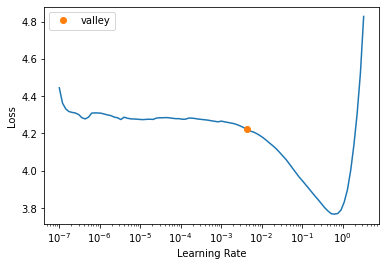

In [40]:
learn = language_model_learner(dls_lm, AWD_LSTM, drop_mult=0.3, metrics=accuracy)

learn.lr_find()

In [41]:
learn.fit_one_cycle(5, 0.004)

epoch,train_loss,valid_loss,accuracy,time
0,4.215540,3.848898,0.299100,00:11
1,4.058708,3.656788,0.309193,00:11
2,3.891695,3.558534,0.318348,00:11
3,3.762478,3.521350,0.321963,00:11
4,3.672122,3.514428,0.322543,00:11


SuggestedLRs(valley=0.0002754228771664202)

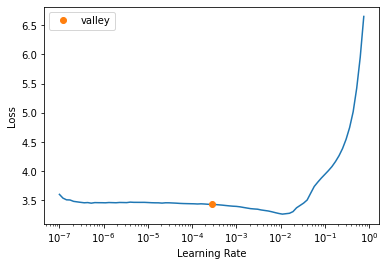

In [42]:
learn.unfreeze()
learn.lr_find()

In [43]:
# train for 20 more epochs on the new lr
learn.fit_one_cycle(20, lr_max=slice(3e-6, 3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,3.465873,3.512089,0.322673,00:13
1,3.454876,3.504663,0.323204,00:13
2,3.444274,3.490720,0.324891,00:13
3,3.435600,3.471388,0.327572,00:13
4,3.417280,3.451654,0.327541,00:13
5,3.395932,3.431502,0.328837,00:13
6,3.380058,3.417701,0.328824,00:13
7,3.361228,3.403436,0.329377,00:13
8,3.333772,3.388666,0.330775,00:13
9,3.307049,3.376151,0.332198,00:13


# Predictions with Bon Jovi Model

In [60]:
def get_most_complex(start_text, preds):
  max_len = 0
  max_i = -1
  for i, pred in enumerate(preds):
    pred_cardinality = len(set(pred.split()))
    if pred_cardinality > max_len:
      max_len = pred_cardinality
      max_i = i
  
  return_str = preds[max_i]

  val = -1
  occurrence = len(start_text.split())
  for i in range(0, occurrence):
    val = return_str.find(' ', val + 1)

  return start_text + return_str[val:return_str.rfind('.')+1]


In [62]:
preds = ['hello', 'hello. goodbye', 'unk unkkk the most most most most complex. nahhhhh nahh']

get_most_complex('this is', preds)

'this is the most most most most complex.'

In [64]:
start_text = "I'm an english man in new york"
words = 60
sentences = 5
preds = [learn.predict(start_text, words, temperature=0.75)
         for sentence in range(sentences)]

get_most_complex(start_text, preds)

"I'm an english man in new york york with a blue sign on my back . I do 'm shine , i n't gon na shake my hands on my own . You ca n't try to get up and lose . You 're running around , in the street where i was . But your heart is standing ."

In [65]:
start_text = "Living on a prayer"
words = 60
sentences = 5
preds = [learn.predict(start_text, words, temperature=0.75)
         for sentence in range(sentences)]

get_most_complex(start_text, preds)

'Living on a prayer porch in West End , New York , DJ Robinson died in a car crash on August 3 , July 7 , of that same year . He had a broken heart and was still alive .'

In [66]:
start_text = "Where has it gone"
words = 60
sentences = 5
preds = [learn.predict(start_text, words, temperature=0.75)
         for sentence in range(sentences)]

get_most_complex(start_text, preds)

"Where has it gone ? i will be there . You want it . We 're not going to be there . There 's nothing that we can do . You need a lot of protection . i want to keep your plans ."